In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
# Load & prep data
df = pd.read_csv('../OLX_cars_dataset00.csv')

# Filter only Karachi & Lahore
df_city = df[df['Registration city'].isin(['Karachi', 'Lahore'])].copy()

# Convert price to lacs
df_city['Price_lacs'] = df_city['Price'] / 100000

# Get top 3 brands overall
top_brands = df_city['Make'].value_counts().head(3).index
df_city = df_city[df_city['Make'].isin(top_brands)]

In [ ]:
# Define mileage bins
bins = np.arange(0, 250001, 25000)
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
df_city['Mileage_bin'] = pd.cut(df_city["KM's driven"], bins=bins, labels=labels, include_lowest=True)

# Calculate mean price per bin
avg_prices = (
    df_city.groupby(['Make', 'Registration city', 'Mileage_bin'])['Price_lacs']
    .mean()
    .reset_index()
)

C:\Users\mtaah\AppData\Local\Temp\ipykernel_11324\66471890.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_city.groupby(['Make', 'Registration city', 'Mileage_bin'])['Price_lacs']


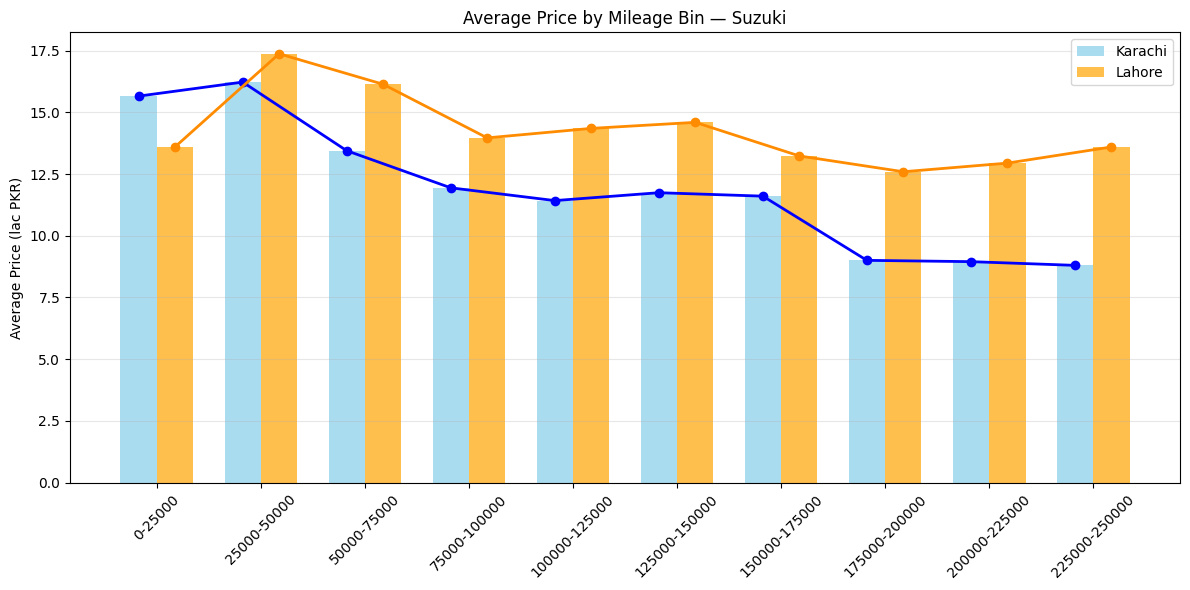

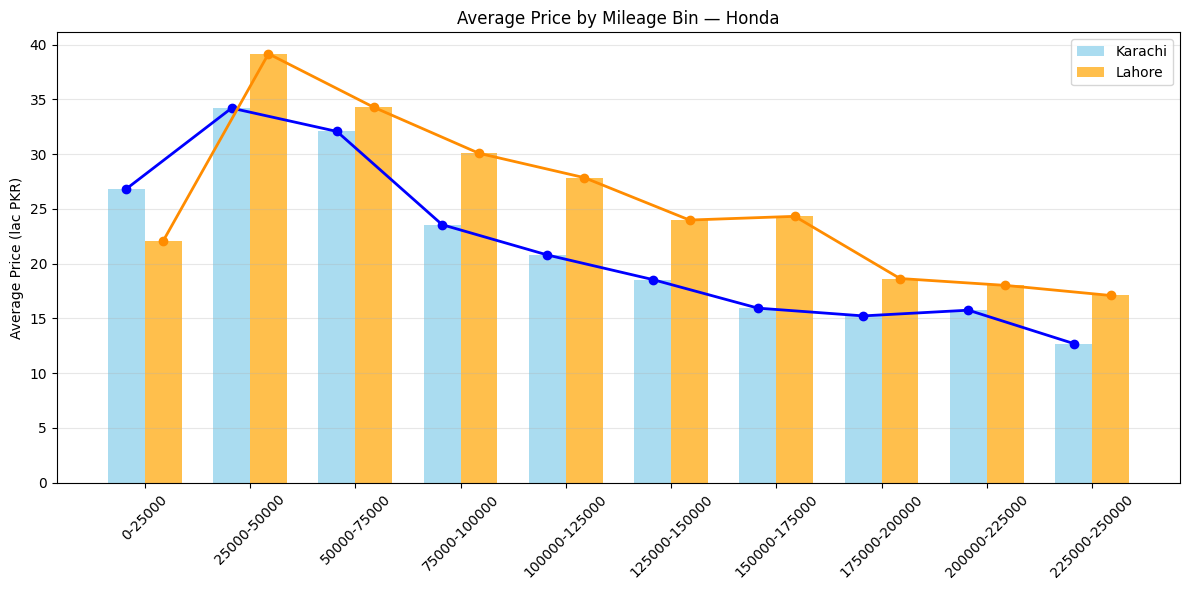

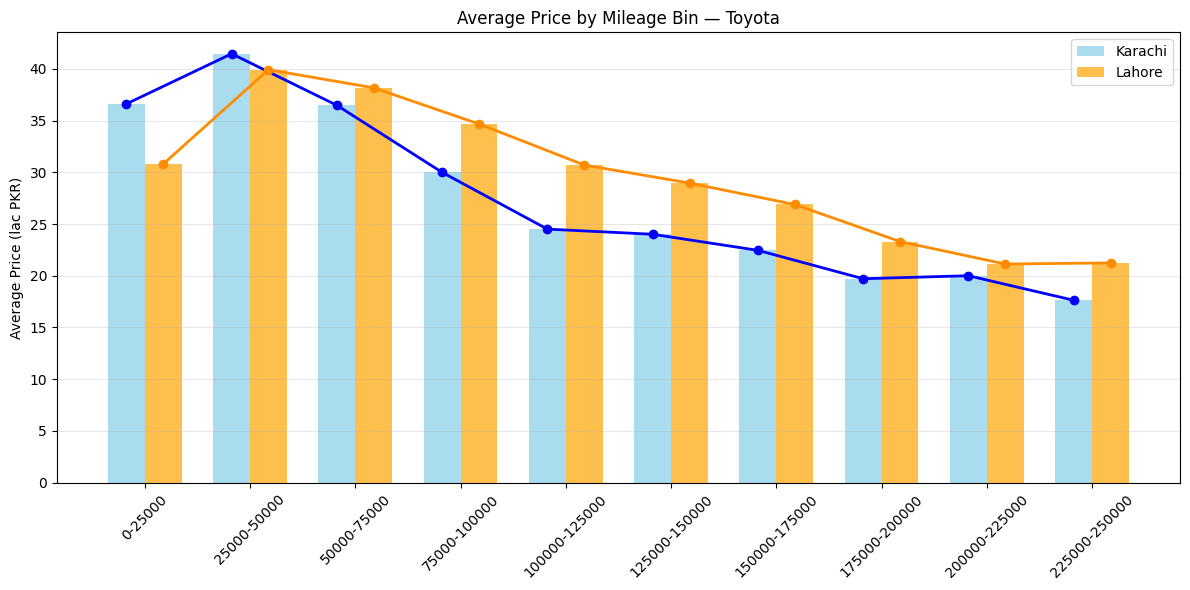

In [31]:
# Plot per brand
for brand in top_brands:
    sub = avg_prices[avg_prices['Make'] == brand]
    
    plt.figure(figsize=(12, 6))
    width = 0.35
    x = np.arange(len(labels))
    
    # Karachi values
    karachi_vals = sub[sub['Registration city'] == 'Karachi'].set_index('Mileage_bin').reindex(labels)['Price_lacs']
    # Lahore values
    lahore_vals = sub[sub['Registration city'] == 'Lahore'].set_index('Mileage_bin').reindex(labels)['Price_lacs']
    
    # Bars
    plt.bar(x - width/2, karachi_vals, width, label='Karachi', color='skyblue', alpha=0.7)
    plt.bar(x + width/2, lahore_vals, width, label='Lahore', color='orange', alpha=0.7)
    
    # Lines over bars
    plt.plot(x - width/2, karachi_vals, color='blue', marker='o', linewidth=2)
    plt.plot(x + width/2, lahore_vals, color='darkorange', marker='o', linewidth=2)
    
    plt.xticks(x, labels, rotation=45)
    plt.ylabel('Average Price (lac PKR)')
    plt.title(f'Average Price by Mileage Bin — {brand}')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
